In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')

In [3]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [4]:
df.columns = ['age',
            'sex',
            'cp',
            'rest hp',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'hd']
#change the row headers
df.head()

,age,sex,cp,rest hp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [5]:
df.dtypes
#shows us the data types so we can see if they have missing values
#if they are object they likely have missing values

age        float64
sex        float64
cp         float64
rest hp    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [7]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [8]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])
#finds amount of rows that have missing data in the two catagories

6

In [9]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]
#prints out rows with missing data

,age,sex,cp,rest hp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
len(df)
#number of rows

302

In [11]:
df_no_missing = df.loc[(df['ca']!='?')&(df['thal']!='?')]
#removes rows with missing data

In [12]:
len(df_no_missing)

296

In [13]:
X = df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,rest hp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [14]:
y = df_no_missing['hd'].copy()
y.head()

0    2
1    1
2    0
3    0
4    0
Name: hd, dtype: int64

In [15]:
X.dtypes

age        float64
sex        float64
cp         float64
rest hp    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [16]:
X['cp'].unique()
#see what different values are in 1.0.1 or chest pain

array([4., 3., 2., 1.])

In [17]:
pd.get_dummies(X, columns=['cp']).head()
#uses get dummies from pandas to do one hot encoding

,age,sex,rest hp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
1,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
3,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,1,0,0


In [18]:
X_encoded=pd.get_dummies(X, columns=['cp',
                                    'restecg',
                                    'slope',
                                    'thal'])
#does one hot coding for the rest of the catagorical data
X_encoded.head()

,age,sex,rest hp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [19]:
y.unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [20]:
y_not_zero_index = y>0 # get the index for each non zero value in y
y[y_not_zero_index] = 1 #set each non zero value to 1 to make it work
y.unique()

array([1, 0], dtype=int64)

In [21]:
#splits data into testing and training data sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state = 42)

#create decision tree and fit it to training data

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train,y_train)

[Text(434.77500000000003, 385.05, 'cp_4.0 <= 0.5\ngini = 0.499\nsamples = 222\nvalue = [116, 106]\nclass = No HD'),
 Text(218.55, 339.75, 'slope_2.0 <= 0.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]\nclass = No HD'),
 Text(120.9, 294.45, 'rest hp <= 185.0\ngini = 0.198\nsamples = 72\nvalue = [64, 8]\nclass = No HD'),
 Text(102.30000000000001, 249.15, 'age <= 56.5\ngini = 0.178\nsamples = 71\nvalue = [64, 7]\nclass = No HD'),
 Text(37.2, 203.85, 'slope_3.0 <= 0.5\ngini = 0.043\nsamples = 45\nvalue = [44, 1]\nclass = No HD'),
 Text(18.6, 158.55, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = No HD'),
 Text(55.800000000000004, 158.55, 'thal_3.0 <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = No HD'),
 Text(37.2, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes HD'),
 Text(74.4, 113.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(167.4, 203.85, 'age <= 59.5\ngini = 0.355\nsamples = 26\nvalue = [20, 6]\nclass = No HD'),
 Text(130.20000000

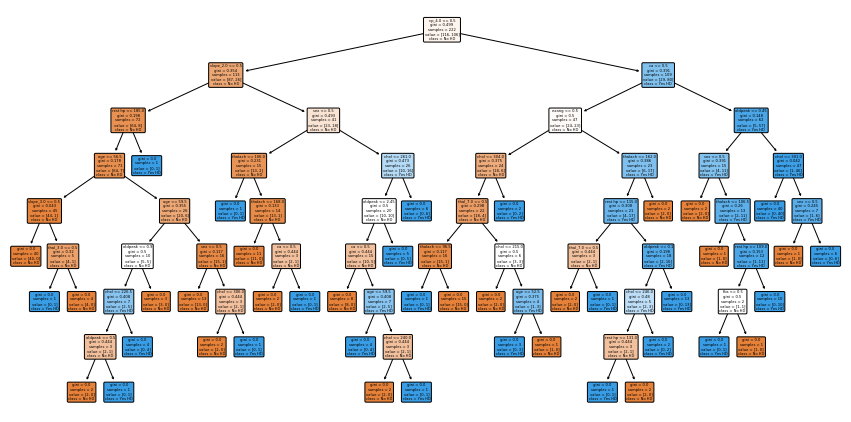

In [22]:
#plot and print decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
          rounded = True,
          class_names=["No HD","Yes HD"],
          feature_names=X_encoded.columns)

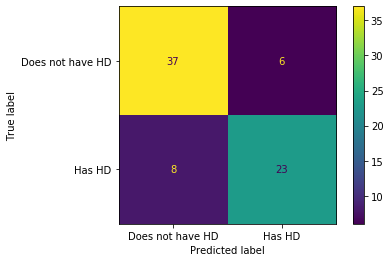

In [23]:
#plot_confusion_matrix() will run test data down the tree and run a confusion matrix
plot_confusion_matrix(clf_dt,X_test, y_test, display_labels=['Does not have HD','Has HD'])

In [24]:
#I will now try to prune the tree to make the tree more accurate as right now it is 86% accurate in 
#does not have HD and 75% in has HD
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)#determine values for alpha 
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

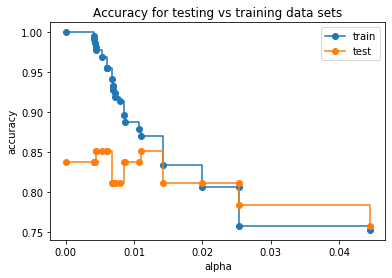

In [25]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

#draws graph
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy for testing vs training data sets")
ax.plot(ccp_alphas, train_scores, marker='o',label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o',label='test', drawstyle='steps-post')
ax.legend()
plt.show()

AttributeError: 'Line2D' object has no property 'markers'

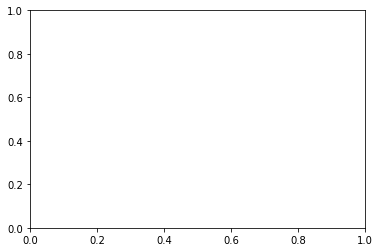

In [26]:
#use cross validation to find accuracy
alpha_loop_values=[]
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
#draw the graph
alpha_results=pd.DataFrame(alpha_loop_values,
                          columns = ['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',markers='o',linestyles = '--')

In [28]:
#.014 is the best alpha
alpha_results((alpha_results['alpha']>0.014)&(alpha_results['alpha'] < 0.05))

TypeError: 'DataFrame' object is not callable

In [29]:
ideal_ccp_alpha = 0.014225

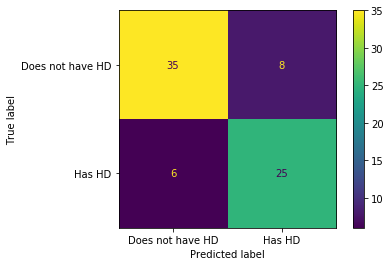

In [30]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train,y_train)
plot_confusion_matrix(clf_dt_pruned,X_test, y_test, display_labels=['Does not have HD','Has HD'])


[Text(418.5, 356.7375, 'cp_4.0 <= 0.5\ngini = 0.499\nsamples = 222\nvalue = [116, 106]\nclass = No HD'),
 Text(167.4, 254.8125, 'slope_2.0 <= 0.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]\nclass = No HD'),
 Text(83.7, 152.8875, 'gini = 0.198\nsamples = 72\nvalue = [64, 8]\nclass = No HD'),
 Text(251.10000000000002, 152.8875, 'sex <= 0.5\ngini = 0.493\nsamples = 41\nvalue = [23, 18]\nclass = No HD'),
 Text(167.4, 50.96249999999998, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = No HD'),
 Text(334.8, 50.96249999999998, 'gini = 0.473\nsamples = 26\nvalue = [10, 16]\nclass = Yes HD'),
 Text(669.6, 254.8125, 'ca <= 0.5\ngini = 0.391\nsamples = 109\nvalue = [29, 80]\nclass = Yes HD'),
 Text(585.9, 152.8875, 'exang <= 0.5\ngini = 0.5\nsamples = 47\nvalue = [24, 23]\nclass = No HD'),
 Text(502.20000000000005, 50.96249999999998, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]\nclass = No HD'),
 Text(669.6, 50.96249999999998, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = Yes HD'

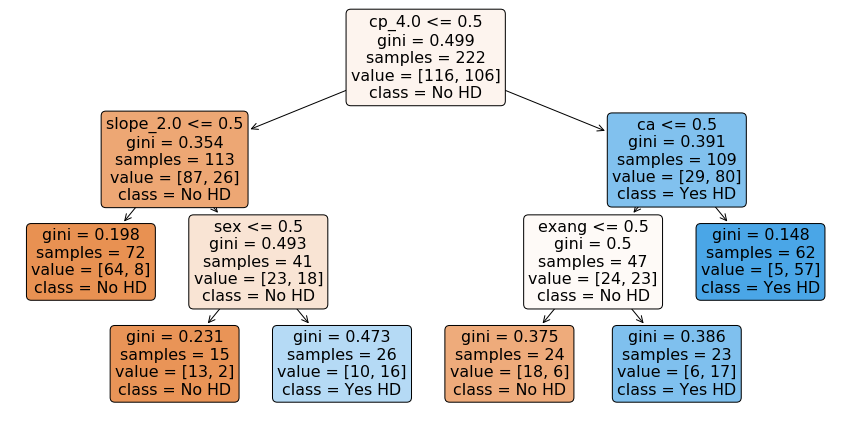

In [31]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled=True,
          rounded = True,
          class_names=["No HD","Yes HD"],
          feature_names=X_encoded.columns)